<a href="https://colab.research.google.com/gist/fernandoferreira-me/61e9e4a25060f95abbfdb8cb90aaaed9/question-rio-projeto-de-disciplina-de-text-mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

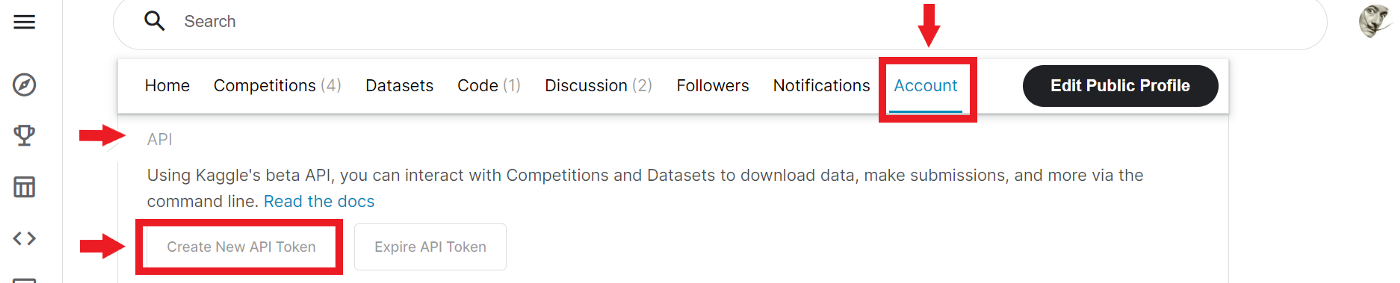

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [2]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rlprafa","key":"f5e1923732ccfba8161a1628243854d0"}'}

Crie a pasta .kaggle

In [3]:
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

Baixe o dataset

In [4]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
 90% 169M/187M [00:01<00:00, 116MB/s]
100% 187M/187M [00:01<00:00, 123MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [5]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [6]:
# Escreva seu código aqui
# Atualizar o spaCy
!pip install -U spacy
# Instalar o modelo pt_core_news_lg
!python -m spacy download pt_core_news_lg

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

# Carregar o modelo pt_core_news_lg
nlp = spacy.load("pt_core_news_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [7]:
import nltk

# Escreva seu código aqui
# Instalar os datasets stopwords, punkt e rslp do NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

## Carregar os módulos usados ao longo desse notebook

In [8]:
#!pip install pyldavis &> /dev/null
# Atualizar e instalar o pyLDAvis com uma versão específica, pois a linha acima não funciona.
!pip install pyldavis==3.2.2 &> /dev/null


import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

import pyLDAvis
import pyLDAvis.sklearn

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [9]:
df['date'] = pd.to_datetime(df.date)
# Create a dataframe named news_2016
# news_2016 =

# Filtrar o DataFrame para obter notícias de 2016 e da categoria 'Mercado'
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'].str.lower() == 'mercado')]

# Verificar o resultado
print(news_2016.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                   title  \
34207  Fazendeira cria própria rede de banda larga e ...   
34238  Alteração na cobrança do ICMS eleva conta de c...   
34245  Ajustes sobre servidores públicos emperram nos...   
34248  Inventor da internet das coisas ataca mitos so...   
34249  Livro analisa empresas de crescimento exponenc...   

                                                    text       date category  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch... 2016-12-31  mercado   
34238  A conta do celular pós-pago ou controle ficará... 2016-12-31  mercado   
34245  A maior parte dos projetos de ajuste das conta... 2016-12-31  mercado   
34248  Desde as primeiras décadas do século 19 se diz... 2016-12-31  mercado   
34249  O Cifras & Letras seleciona semanalmente lança... 2016-12-31  mercado   

      subcategory                                               link  
34207         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...  
34238         Na

In [10]:
num_rows = news_2016.shape[0]
print(f"Número de linhas: {num_rows}")

Número de linhas: 7943


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [11]:
# Adicionando imports necessários que não estavam presentes no notebook
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from nltk.corpus import stopwords

# Inicialize o stemmer e as stopwords
stemmer = RSLPStemmer()
stop_words = set(stopwords.words('portuguese'))

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  #escreva seu código aqui
  # Tokenize the text
  tokens = word_tokenize(text, language='portuguese')

  # Filter out non-alphabetic tokens and stop words
  filtered_tokens = [token for token in tokens if token.isalpha() and token.lower() not in stop_words]

  # Stem the filtered tokens
  stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

  return stemmed_tokens

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

# Verificar o resultado
print(news_2016[['text', 'nltk_tokens']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

                                                    text  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...   
34238  A conta do celular pós-pago ou controle ficará...   
34245  A maior parte dos projetos de ajuste das conta...   
34248  Desde as primeiras décadas do século 19 se diz...   
34249  O Cifras & Letras seleciona semanalmente lança...   

                                             nltk_tokens  
34207  [apen, mulh, fazend, diz, christin, cond, modé...  
34238  [cont, celul, control, fic, car, part, decis, ...  
34245  [mai, part, projet, ajust, cont, públic, aprov...  
34248  [desd, prim, déc, sécul, diz, not, óper, sinfo...  
34249  [cifr, letr, selec, seman, lanç, áre, negóci, ...  


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [12]:
# Escreva seu código aqui
# ...
# news_2016.loc[:, 'spacy_doc'] = ...(complete)
from tqdm.notebook import tqdm
tqdm.pandas()

# Aplicar o modelo Spacy a cada texto do dataset e criar a coluna 'spacy_doc'
news_2016['spacy_doc'] = news_2016['text'].progress_apply(nlp)

# Verificar o resultado
print(news_2016[['text', 'spacy_doc']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

                                                    text  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...   
34238  A conta do celular pós-pago ou controle ficará...   
34245  A maior parte dos projetos de ajuste das conta...   
34248  Desde as primeiras décadas do século 19 se diz...   
34249  O Cifras & Letras seleciona semanalmente lança...   

                                               spacy_doc  
34207  (", Sou, apenas, a, mulher, de, um, fazendeiro...  
34238  (A, conta, do, celular, pós-pago, ou, controle...  
34245  (A, maior, parte, dos, projetos, de, ajuste, d...  
34248  (Desde, as, primeiras, décadas, do, século, 19...  
34249  (O, Cifras, &, Letras, seleciona, semanalmente...  


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [13]:
#imports necessários que não estavam presentes:
from typing import Set, List
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    # Escreva seu código aqui
    undesired_tokens = {"o", "em", "em o", "em a", "ano"}
    return w.is_alpha and w.lemma_.lower() not in complete_stopwords and w.lemma_.lower() not in undesired_tokens

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    # Escreva seu cógigo aqui
    return [token.lemma_.lower() for token in doc if filter(token)]

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

# Verificar o resultado
print(news_2016[['text', 'spacy_lemma']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

                                                    text  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...   
34238  A conta do celular pós-pago ou controle ficará...   
34245  A maior parte dos projetos de ajuste das conta...   
34248  Desde as primeiras décadas do século 19 se diz...   
34249  O Cifras & Letras seleciona semanalmente lança...   

                                             spacy_lemma  
34207  [mulher, fazendeiro, christine, conder, modést...  
34238  [conta, de o, celular, controle, ficar, cara, ...  
34245  [de o, projeto, ajuste, de o, conta, público, ...  
34248  [década, de o, século, nota, ópera, sinfonia, ...  
34249  [cifras, letras, selecionar, semanalmente, lan...  


## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [14]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # Escreva seu código aqui
  return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

# Verificar o resultado
print(news_2016[['text', 'spacy_ner']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

                                                    text  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...   
34238  A conta do celular pós-pago ou controle ficará...   
34245  A maior parte dos projetos de ajuste das conta...   
34248  Desde as primeiras décadas do século 19 se diz...   
34249  O Cifras & Letras seleciona semanalmente lança...   

                                               spacy_ner  
34207  [Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri...  
34238  [Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA...  
34245  [Executivo dos três Estados, Assembleias locai...  
34248  [MIT, Instituto de Tecnologia de Massachusetts...  
34249  [NACIONAIS  , Presidente da Singularity Univer...  


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [15]:
class Vectorizer:
  #def __init__(self, doc_tokens: List):
  def __init__(self, doc_tokens: List[List[str]]):
    #self.doc_tokens = doc_tokens
    #self.tfidf = None
    self.doc_tokens = [" ".join(tokens) for tokens in doc_tokens]
    self.tfidf_vectorizer = None
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      # Escreva seu código aqui
      self.tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=10)
      self.tfidf = self.tfidf_vectorizer.fit_transform(self.doc_tokens)
      return self.tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf_vectorizer

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)
#
vectorizer()  # Chama a função para gerar a matriz TF-IDF


def tokens2tfidf(tokens):
  #tokens_str = " ".join(tokens)
    tokens_str = " ".join(tokens)
    array =  vectorizer().transform([tokens_str]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)


# Verificar o resultado
print(news_2016[['text', 'tfidf']].head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

                                                    text  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...   
34238  A conta do celular pós-pago ou controle ficará...   
34245  A maior parte dos projetos de ajuste das conta...   
34248  Desde as primeiras décadas do século 19 se diz...   
34249  O Cifras & Letras seleciona semanalmente lança...   

                                                   tfidf  
34207  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
34238  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
34245  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
34248  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
34249  [0.0, 0.0, 0.042331897530893406, 0.0, 0.0, 0.0...  


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [16]:
# Definir o número de tópicos e o número máximo de iterações
N_TOPICS = 9
MAX_ITER = 100

corpus = np.array(news_2016.tfidf.tolist())
#Escreva seu código aqui
#lda = ... (complete)
# Inicializar o modelo LDA
lda = LDA(n_components=N_TOPICS, max_iter=MAX_ITER, random_state=SEED)

# Ajustar o modelo LDA ao corpus
lda.fit(corpus)

# Verificar os tópicos extraídos
for idx, topic in enumerate(lda.components_):
    print(f"Top 10 palavras do tópico #{idx}:")
    print([vectorizer.tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 palavras do tópico #0:
['contribuinte', 'declaração', 'ficha', 'restituição', 'pokémon', 'rendimento', 'receita', 'de', 'dependente', 'cpf']


Top 10 palavras do tópico #1:
['petrobras', 'veículo', 'companhia', 'de', 'gás', 'petróleo', 'carro', 'empresa', 'montadora', 'produção']


Top 10 palavras do tópico #2:
['editora', 'pág', 'autor', 'autores', 'autora', 'cifras', 'letras', 'semanalmente', 'nacionais', 'internacionais']


Top 10 palavras do tópico #3:
['de', 'banco', 'por', 'mercado', 'empresa', 'este', 'bilhão', 'em', 'queda', 'país']


Top 10 palavras do tópico #4:
['energia', 'petróleo', 'opep', 'barri', 'irã', 'produção', 'aneel', 'saudita', 'arábia', 'bandeira']


Top 10 palavras do tópico #5:
['inbev', 'ab', 'sabmiller', 'cerveja', 'cervejaria', 'auditor', 'hyundai', 'joint', 'desvincular', 'ambev']


Top 10 palavras do tópico #6:
['estácio', 'kroton', 'ensino', 'aluno', 'drone', 'cade', 'zaher', 'educacional', 'distância', 'fies']


Top 10 palavras do tópico #7:
['de

### Visualize os tópicos usando a ferramenta pyLDAVis

In [17]:
# Escreva seu código aqui
# ...

# Patch direto na função interna do pyLDAvis para garantir o uso correto de `drop`
def patched_topic_info(topic_term_dists, topic_proportion, term_frequency, term_topic_freq, vocab, lambda_step, R, n_jobs, start_index):
    import pandas as pd
    import numpy as np

    # Espera-se que topic_proportion tenha a forma [n_topics, 1], para que possamos chamar
    # ravel() para obter um array 1-d de elementos n_topics.
    topic_proportion = topic_proportion.ravel()

    topic_frequency = topic_proportion * term_frequency.sum()
    term_frequency = term_frequency + 0.00001

    data = {
        'Term': vocab,
        'Freq': term_frequency,
        'Total': term_frequency,
        'Category': ['Default' for i in range(len(vocab))]
    }
    default_term_info = pd.DataFrame(data)
    default_term_info = default_term_info.sort_values(by='Freq', ascending=False).head(R)
    default_term_info['saliency'] = default_term_info['Freq'] / default_term_info['Total']
    default_term_info = default_term_info.sort_values(by='saliency', ascending=False).head(R).drop(columns='saliency')

    return default_term_info

# Substituir a função original pela função personalizada
pyLDAvis._prepare._topic_info = patched_topic_info

# Função personalizada para preparar dados para pyLDAvis com argumentos nomeados
def custom_prepare(lda_model, corpus, vectorizer):
    doc_lengths = np.array(corpus.sum(axis=1)).flatten().tolist()
    term_frequency = np.array(corpus.sum(axis=0)).flatten().tolist()
    vocab = vectorizer.get_feature_names_out()

    topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
    doc_topic_dists = lda_model.transform(corpus)

    data = {
        'topic_term_dists': topic_term_dists,
        'doc_topic_dists': doc_topic_dists,
        'doc_lengths': doc_lengths,
        'vocab': vocab,
        'term_frequency': term_frequency
    }

    return pyLDAvis.prepare(**data)

# Preparar a visualização do pyLDAvis com a função personalizada
lda_vis_data = custom_prepare(lda, corpus, vectorizer.tfidf_vectorizer)

# Salvar a visualização em um arquivo HTML
pyLDAvis.save_html(lda_vis_data, 'lda_visualization.html')

# Exibir a visualização no Google Colab
from IPython.display import HTML
HTML(filename='lda_visualization.html')




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [36]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # Escreva seu código aqui
    topic_distribution = lda.transform(tfidf.reshape(1, -1))
    return topic_distribution.argmax()

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

# Verificar o resultado
print(news_2016[['text', 'topic']].head())
print(news_2016['topic'].value_counts())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/7943 [00:00<?, ?it/s]

                                                    text  topic
34207  "Sou apenas a mulher de um fazendeiro", diz Ch...      3
34238  A conta do celular pós-pago ou controle ficará...      7
34245  A maior parte dos projetos de ajuste das conta...      7
34248  Desde as primeiras décadas do século 19 se diz...      3
34249  O Cifras & Letras seleciona semanalmente lança...      3
topic
3    5728
7    1956
1     132
0     100
8      17
4      10
Name: count, dtype: int64


## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


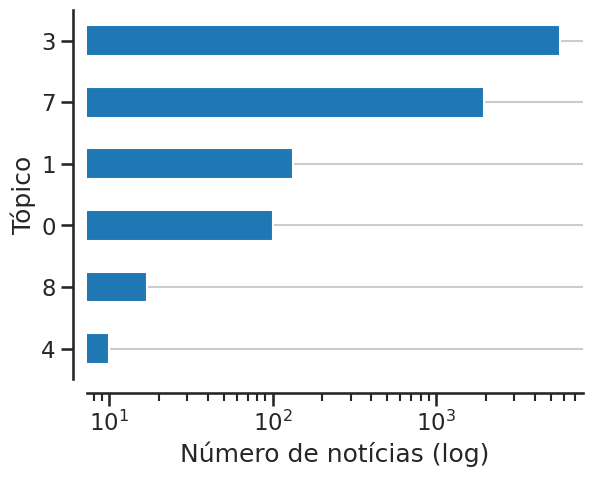

In [19]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


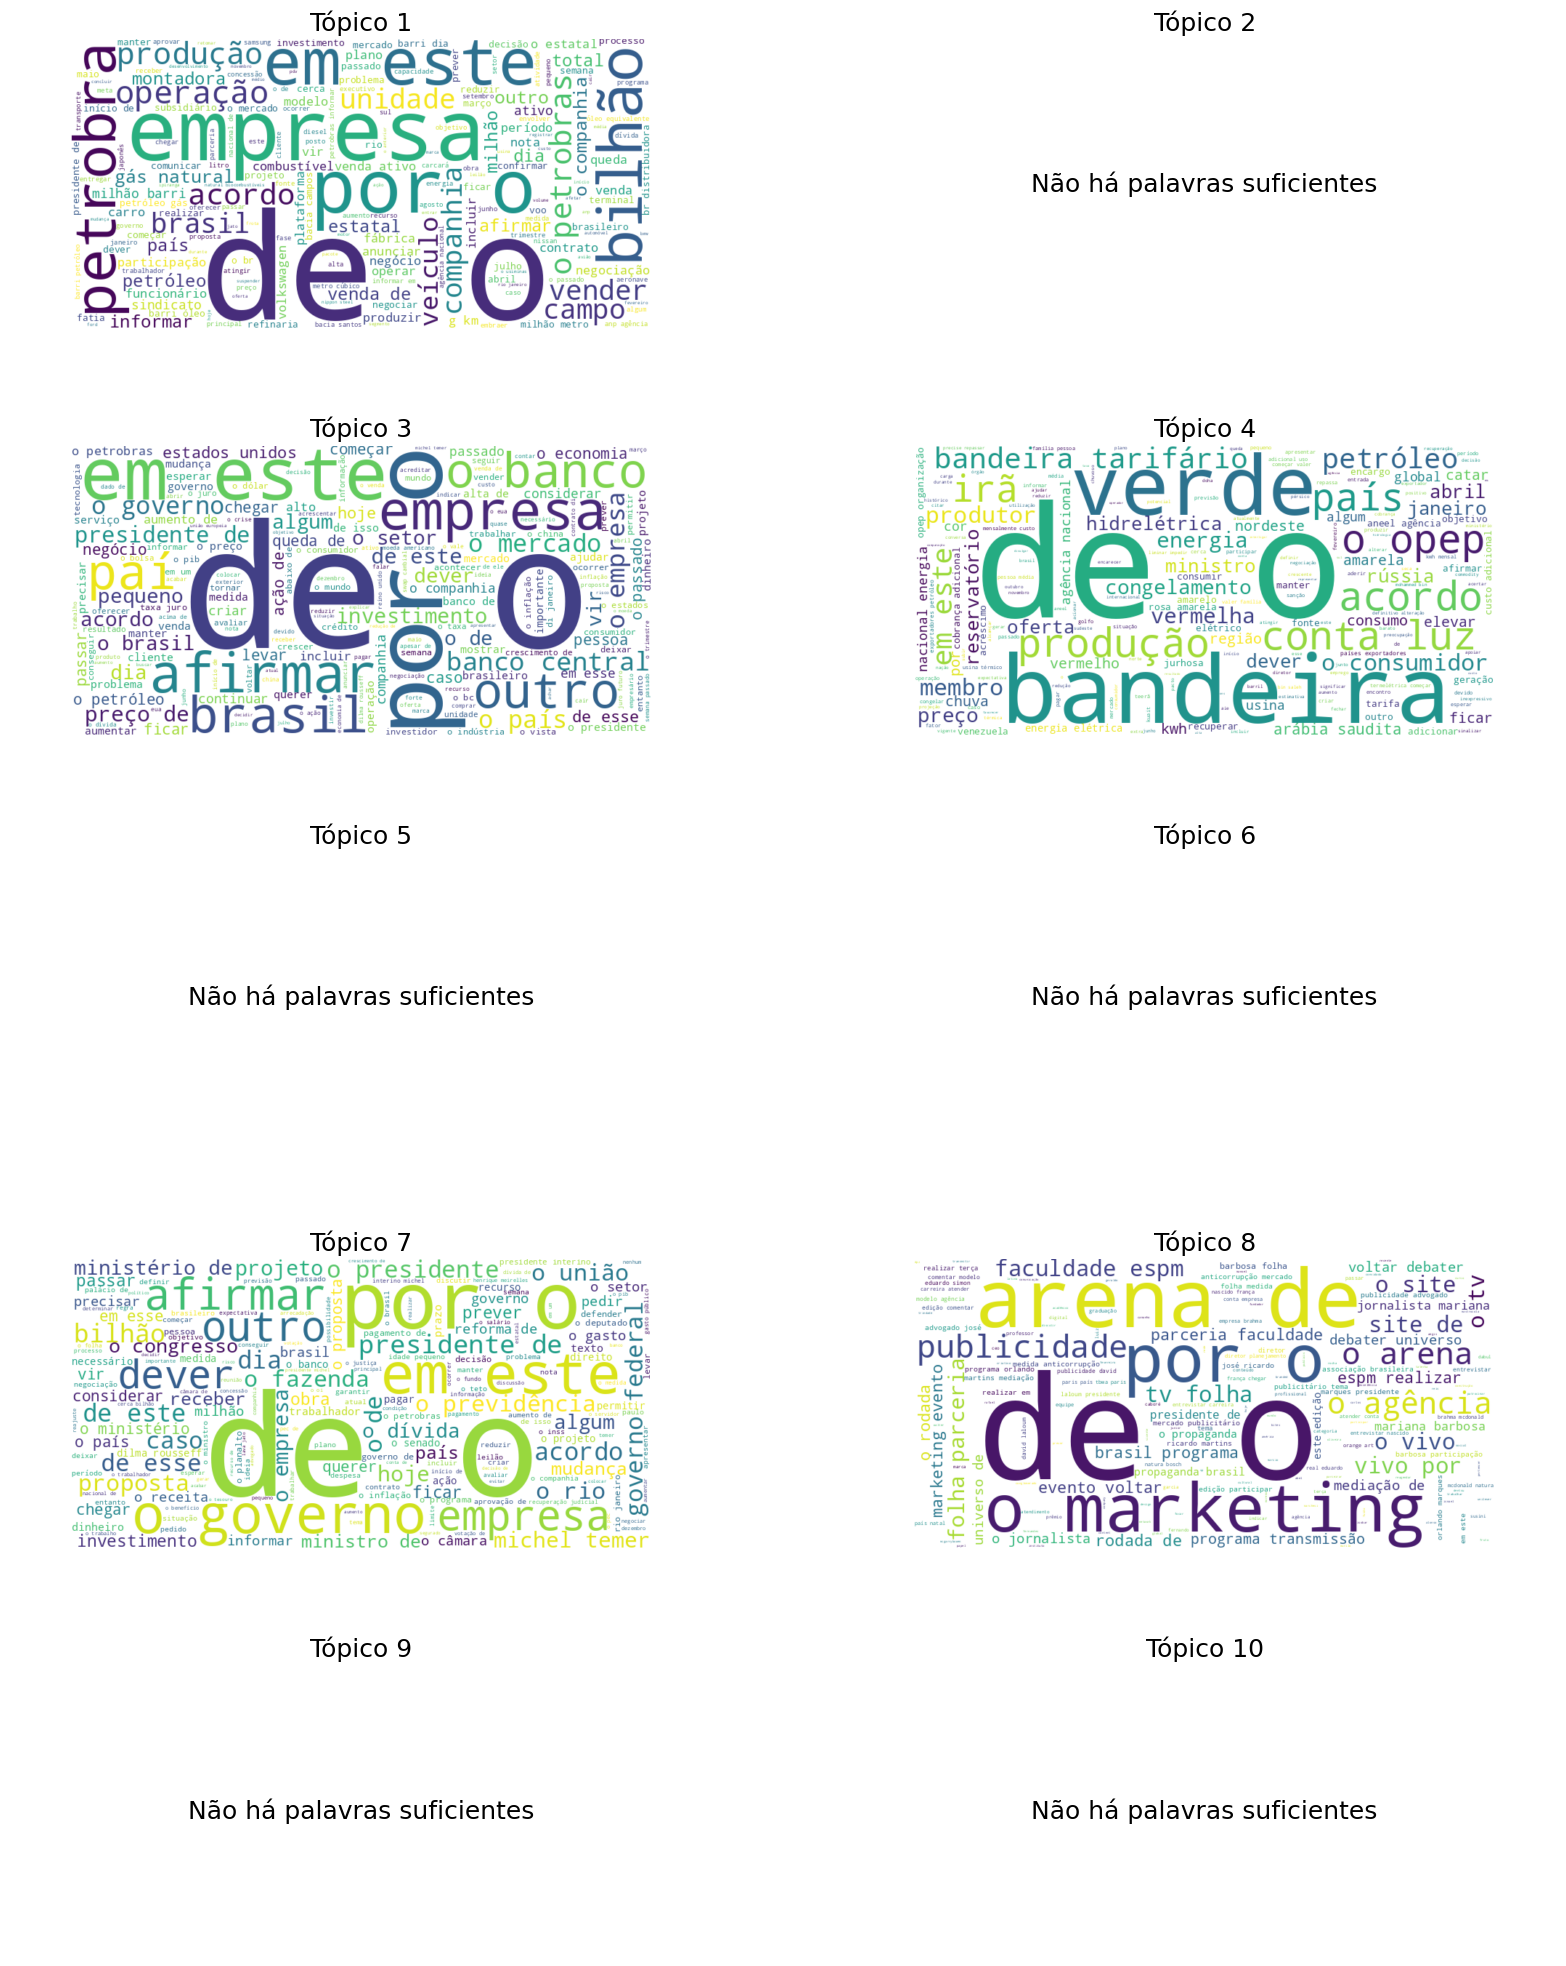

In [38]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)

    if not string_complete.strip():
        #return None
        ax.text(0.5, 0.5, 'Não há palavras suficientes', horizontalalignment='center', verticalalignment='center')
        ax.axis('off')
    else:
      plot_wordcloud(string_complete, ax)

    return ax

fig, axis = plt.subplots(5, 2, figsize=(16, 20))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.2)

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


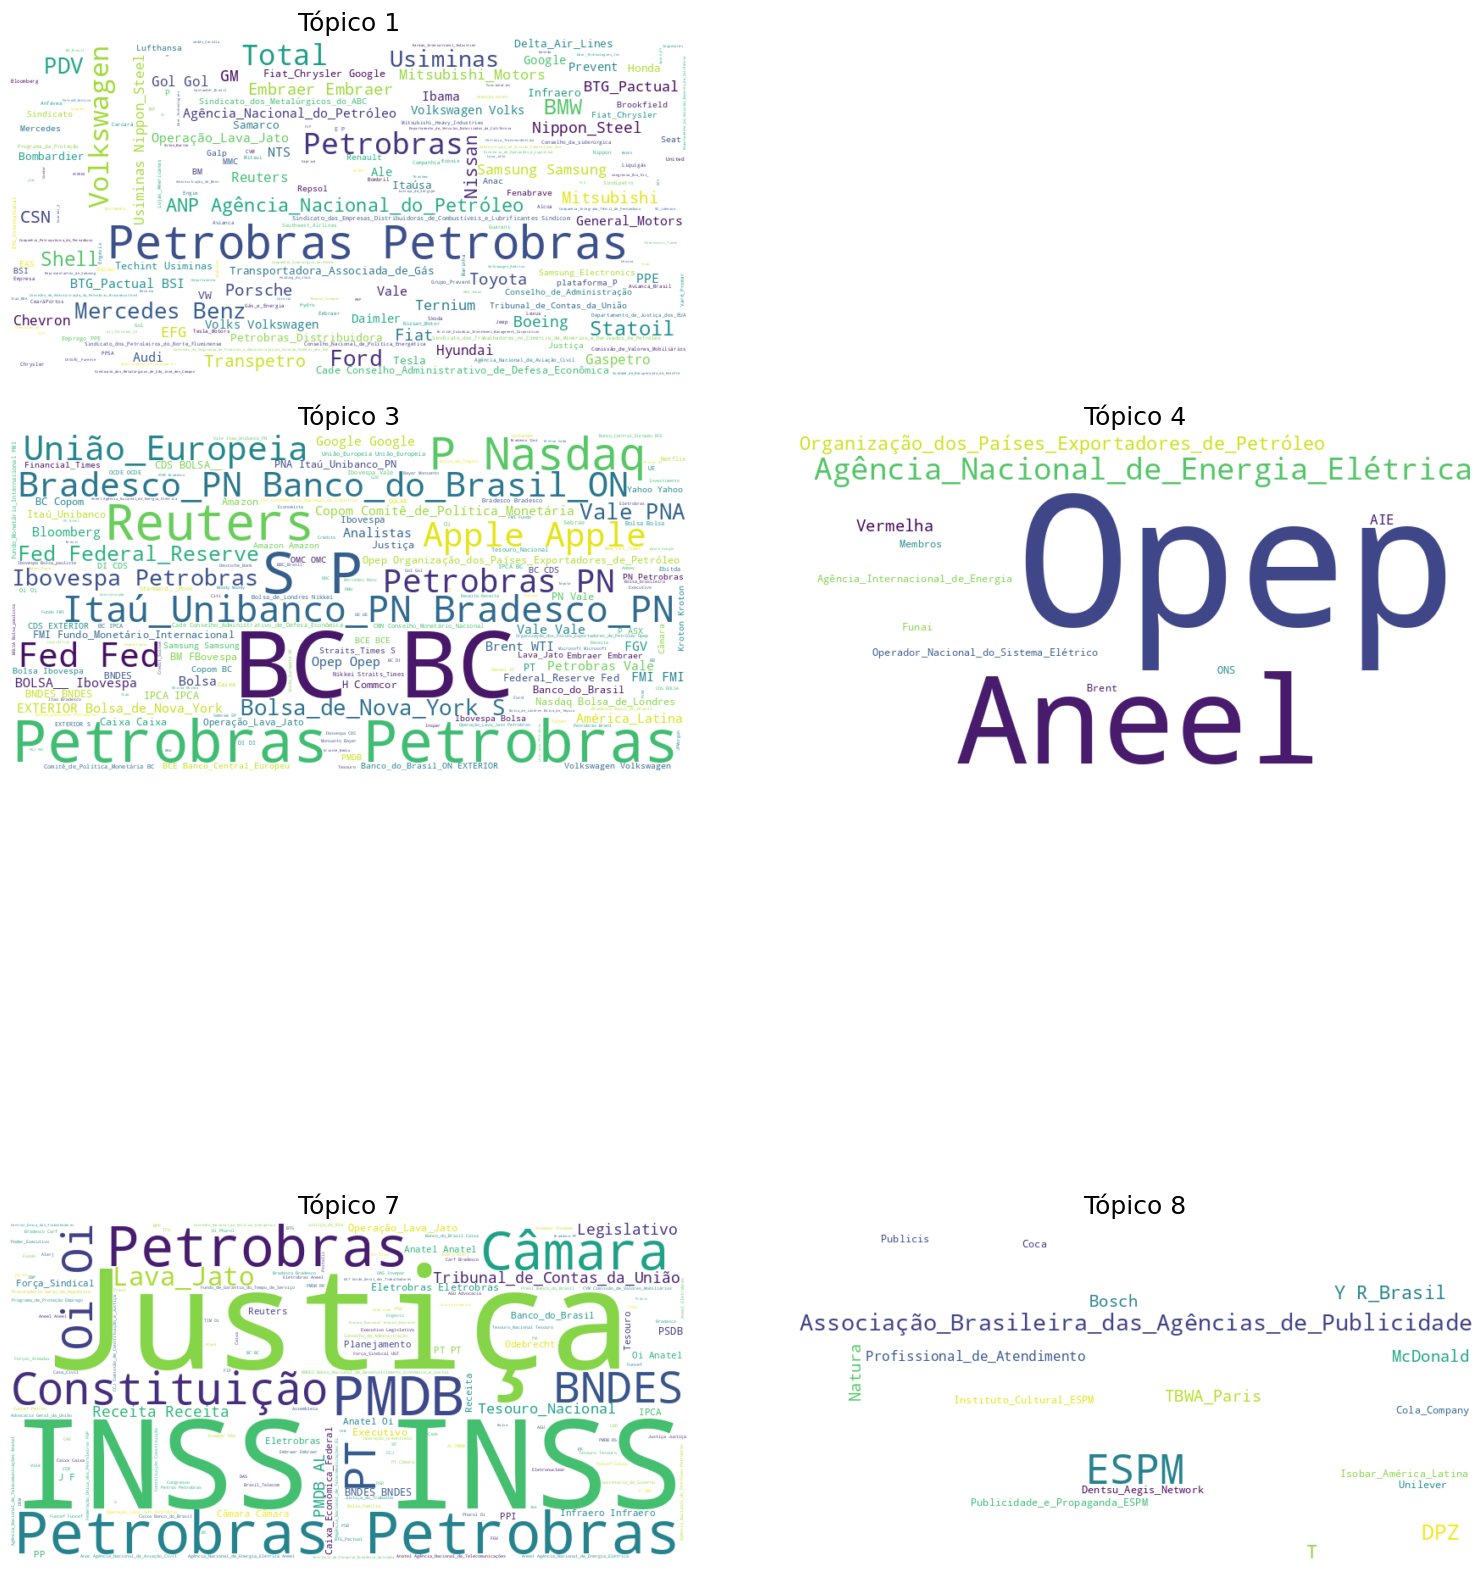

In [21]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(5, 2, figsize=(16, 20))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

In [23]:
# Código escrito para analisar os tópicos extraídos para que eu possa os descrever.
for idx, topic in enumerate(lda.components_):
    print(f"Tópico #{idx}:")
    print([vectorizer.tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Tópico #0:
['cpf', 'dependente', 'de', 'receita', 'rendimento', 'pokémon', 'restituição', 'ficha', 'declaração', 'contribuinte']


Tópico #1:
['produção', 'montadora', 'empresa', 'carro', 'petróleo', 'gás', 'de', 'companhia', 'veículo', 'petrobras']


Tópico #2:
['internacionais', 'nacionais', 'semanalmente', 'letras', 'cifras', 'autora', 'autores', 'autor', 'pág', 'editora']


Tópico #3:
['país', 'queda', 'em', 'bilhão', 'este', 'empresa', 'mercado', 'por', 'banco', 'de']


Tópico #4:
['bandeira', 'arábia', 'saudita', 'aneel', 'produção', 'irã', 'barri', 'opep', 'petróleo', 'energia']


Tópico #5:
['ambev', 'desvincular', 'joint', 'hyundai', 'auditor', 'cervejaria', 'cerveja', 'sabmiller', 'ab', 'inbev']


Tópico #6:
['fies', 'distância', 'educacional', 'zaher', 'cade', 'drone', 'aluno', 'ensino', 'kroton', 'estácio']


Tópico #7:
['projeto', 'temer', 'público', 'ministro', 'bilhão', 'federal', 'por', 'proposta', 'governo', 'de']


Tópico #8:
['de', 'suco', 'arena', 'espm', 'publicida